In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
#!pip install Pillow
from PIL import Image
!pip install pyshp
import shapefile

     -------------------------------------- 46.5/46.5 kB 576.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


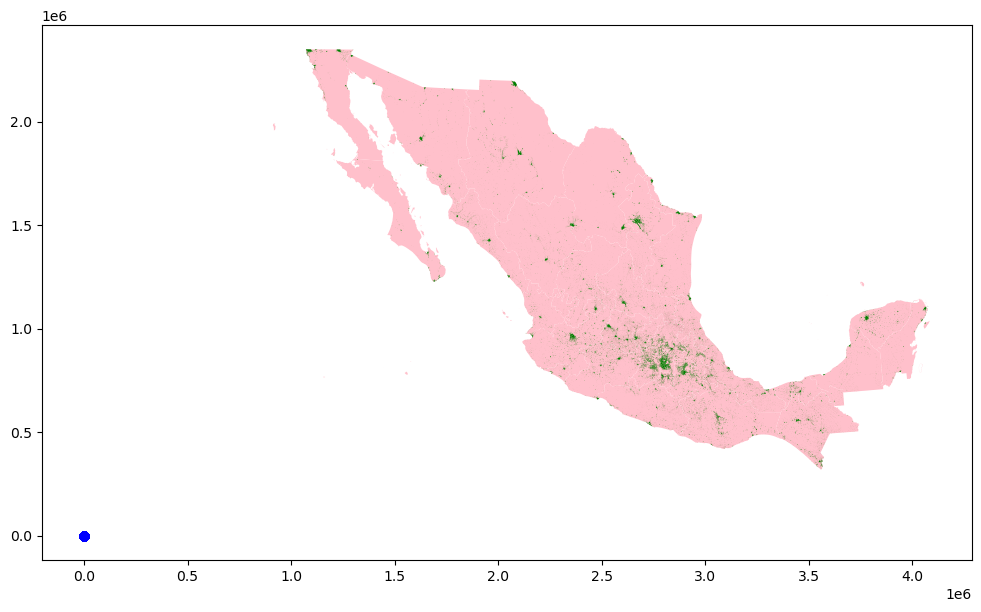

In [73]:
#Cargamos todas las entidades para ver el mapa de México detallado
#ruta_mexico = r'C:\Users\User\Maestria\Tesis\889463770541_s'

fig00a = gpd.read_file(r'C:\Users\User\Maestria\Tesis\889463770541_s\mg2022_integrado\00a.shp')
fig00ent = gpd.read_file(r'C:\Users\User\Maestria\Tesis\889463770541_s\mg2022_integrado\00ent.shp')
fig00l = gpd.read_file(r'C:\Users\User\Maestria\Tesis\889463770541_s\mg2022_integrado\00l.shp')
fig001pr = gpd.read_file(r'C:\Users\User\Maestria\Tesis\889463770541_s\mg2022_integrado\00lpr.shp')
fig00mun = gpd.read_file(r'C:\Users\User\Maestria\Tesis\889463770541_s\mg2022_integrado\00mun.shp')

# Crear un objeto de figura y un objeto de ejes
fig, ax = plt.subplots(figsize=(12,12))



# Dibujar cada GeoDataFrame en el mismo mapa
fig00ent.plot(ax=ax, color='pink')
#fig00mun.plot(ax=ax, color='orange') #Municipios
#fig00a.plot(ax=ax, color='white')
#fig001pr.plot(ax=ax, color='purple')
fig00l.plot(ax=ax, color='green')
#Puntos de Mayoreo
gdf_mayoristas.plot(ax=ax, color='blue')

plt.show()

In [74]:
#Tengo que buscar la forma de estalar los puntos al mapa y tomarlos como limites

In [58]:
#Cargar base de datos, descargada de INEGI
df = pd.read_csv('denue_inegi_43_.csv', encoding='ISO-8859-1')
df

C:\Users\User\AppData\Local\Temp\ipykernel_8020\3448686326.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('denue_inegi_43_.csv', encoding='ISO-8859-1')


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,7702819,01001434225001101000000000S1,2 CONEXION DE SERVICIOS INFORMATICOS,NaN,434225,Comercio al por mayor de equipo y material elé...,0 a 5 personas,CALLE,5 DE MAYO,CALLE,...,Aguascalientes,0638,14,NaN,SERVICIOS@2CONEXION.COM,WWW.2CONEXION.COM,Fijo,21.882623,-102.297289,2019-11
1,6282298,01005431110000031001004190S9,2227 ORGANIZACIÓN SAHUAYO AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CIRCUITO,AGUASCALIENTES SUR,CIRCUITO,...,Parque Industrial del Valle de Aguascalientes ...,0035,3,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.963603,-102.279136,2010-07
2,6281310,01005431191000017000002859S8,2251 AGUAS NORTE,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,251 y más personas,CARRETERA,PANAMERICANA,OTRO (ESPECIFIQUE),...,Coral [Ex-Viñedos],0035,800,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.954421,-102.291284,2010-07
3,6281199,01001431191000106000002859S8,2252 AGUAS SUR,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,101 a 250 personas,CARRETERA,PANAMERICANA SUR,CALLE,...,Aguascalientes,1477,25,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.840966,-102.280381,2010-07
4,6281969,01001431110000121001004190S7,2273 AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CALLE,SOYA,AVENIDA,...,Aguascalientes,1975,16,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.910507,-102.296908,2010-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168035,6417662,32017431160000033001003869S8,YAKULT,YAKULT SA DE CV,431160,Comercio al por mayor de leche y otros product...,31 a 50 personas,CALLE,PABLO PICASSO,CALLE,...,Guadalupe,0224,16,NaN,NaN,WWW.YAKULT.COM.MX,Fijo,22.751397,-102.501325,2010-07
168036,9041093,32017434222000101000000000M8,ZAC PERFORATIC,ZAC PERFORATIC SA DE CV,434222,Comercio al por mayor de productos químicos pa...,0 a 5 personas,AVENIDA,5 DE MAYO,PRIVADA,...,Guadalupe,0667,16,NaN,NaN,NaN,Fijo,22.755366,-102.524299,2019-11
168037,6417535,32017431160000011000004198S4,ZACATECAS,DANONE DE MEXICO,431160,Comercio al por mayor de leche y otros product...,31 a 50 personas,CALLE,CANTERA,CALLE,...,Guadalupe,0239,4,NaN,NaN,NaN,Fijo,22.740396,-102.503876,2010-07
168038,9252599,32056431160000044000002515S3,ZACATECAS,MARCAS NESTLE SA DE CV,431160,Comercio al por mayor de leche y otros product...,51 a 100 personas,AVENIDA,Tránsito Pesado,CALLE,...,Zacatecas,1220,1,NaN,RAYMUNDO.RODRIGUEZ@MX.NESTLE.COM,NaN,Fijo,22.754184,-102.575988,2020-04


In [10]:
#¿Cuantas abarroteras mayoristas existen?
len(df.id)

168040

In [59]:
#Agregamos una columna de clasificacion para saber que es mayorista
May = []
for i in range(len(df)):
    may = 'Mayorista'
    May.append(may)
df['Clasificación'] = May
df

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,Clasificación
0,7702819,01001434225001101000000000S1,2 CONEXION DE SERVICIOS INFORMATICOS,NaN,434225,Comercio al por mayor de equipo y material elé...,0 a 5 personas,CALLE,5 DE MAYO,CALLE,...,0638,14,NaN,SERVICIOS@2CONEXION.COM,WWW.2CONEXION.COM,Fijo,21.882623,-102.297289,2019-11,Mayorista
1,6282298,01005431110000031001004190S9,2227 ORGANIZACIÓN SAHUAYO AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CIRCUITO,AGUASCALIENTES SUR,CIRCUITO,...,0035,3,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.963603,-102.279136,2010-07,Mayorista
2,6281310,01005431191000017000002859S8,2251 AGUAS NORTE,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,251 y más personas,CARRETERA,PANAMERICANA,OTRO (ESPECIFIQUE),...,0035,800,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.954421,-102.291284,2010-07,Mayorista
3,6281199,01001431191000106000002859S8,2252 AGUAS SUR,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,101 a 250 personas,CARRETERA,PANAMERICANA SUR,CALLE,...,1477,25,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.840966,-102.280381,2010-07,Mayorista
4,6281969,01001431110000121001004190S7,2273 AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CALLE,SOYA,AVENIDA,...,1975,16,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.910507,-102.296908,2010-07,Mayorista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168035,6417662,32017431160000033001003869S8,YAKULT,YAKULT SA DE CV,431160,Comercio al por mayor de leche y otros product...,31 a 50 personas,CALLE,PABLO PICASSO,CALLE,...,0224,16,NaN,NaN,WWW.YAKULT.COM.MX,Fijo,22.751397,-102.501325,2010-07,Mayorista
168036,9041093,32017434222000101000000000M8,ZAC PERFORATIC,ZAC PERFORATIC SA DE CV,434222,Comercio al por mayor de productos químicos pa...,0 a 5 personas,AVENIDA,5 DE MAYO,PRIVADA,...,0667,16,NaN,NaN,NaN,Fijo,22.755366,-102.524299,2019-11,Mayorista
168037,6417535,32017431160000011000004198S4,ZACATECAS,DANONE DE MEXICO,431160,Comercio al por mayor de leche y otros product...,31 a 50 personas,CALLE,CANTERA,CALLE,...,0239,4,NaN,NaN,NaN,Fijo,22.740396,-102.503876,2010-07,Mayorista
168038,9252599,32056431160000044000002515S3,ZACATECAS,MARCAS NESTLE SA DE CV,431160,Comercio al por mayor de leche y otros product...,51 a 100 personas,AVENIDA,Tránsito Pesado,CALLE,...,1220,1,NaN,RAYMUNDO.RODRIGUEZ@MX.NESTLE.COM,NaN,Fijo,22.754184,-102.575988,2020-04,Mayorista


Vamos a convertir los datos a geopandas ya que la información cuenta con latitudes y longitudes. Intentemos correrlo con geopandas, sin embargo lo más probable es que no podamos poner el fondo del mapa de México, ya que se encuentran a diferentes escalas 

### Create a GeoDataFrame

In [60]:
#create GeoDataFrame
gdf_mayoristas = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitud, df.latitud))
gdf_mayoristas.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,Clasificación,geometry
0,7702819,01001434225001101000000000S1,2 CONEXION DE SERVICIOS INFORMATICOS,NaN,434225,Comercio al por mayor de equipo y material elé...,0 a 5 personas,CALLE,5 DE MAYO,CALLE,...,14,NaN,SERVICIOS@2CONEXION.COM,WWW.2CONEXION.COM,Fijo,21.882623,-102.297289,2019-11,Mayorista,POINT (-102.29729 21.88262)
1,6282298,01005431110000031001004190S9,2227 ORGANIZACIÓN SAHUAYO AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CIRCUITO,AGUASCALIENTES SUR,CIRCUITO,...,3,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.963603,-102.279136,2010-07,Mayorista,POINT (-102.27914 21.96360)
2,6281310,01005431191000017000002859S8,2251 AGUAS NORTE,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,251 y más personas,CARRETERA,PANAMERICANA,OTRO (ESPECIFIQUE),...,800,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.954421,-102.291284,2010-07,Mayorista,POINT (-102.29128 21.95442)
3,6281199,01001431191000106000002859S8,2252 AGUAS SUR,BIMBO SA DE CV,431191,Comercio al por mayor de pan y pasteles,101 a 250 personas,CARRETERA,PANAMERICANA SUR,CALLE,...,25,NaN,NaN,WWW.BIMBO.COM.MX,Fijo,21.840966,-102.280381,2010-07,Mayorista,POINT (-102.28038 21.84097)
4,6281969,01001431110000121001004190S7,2273 AGUASCALIENTES,IMPULSORA SAHUAYO SA DE CV,431110,Comercio al por mayor de abarrotes,101 a 250 personas,CALLE,SOYA,AVENIDA,...,16,NaN,NaN,WWW.SAHUAYO.COM.MX,Fijo,21.910507,-102.296908,2010-07,Mayorista,POINT (-102.29691 21.91051)


In [16]:
gdf_mayoristas.dtypes

id               int64
clee            object
nom_estab       object
raz_social      object
codigo_act       int64
nombre_act      object
per_ocu         object
tipo_vial       object
nom_vial        object
tipo_v_e_1      object
nom_v_e_1       object
tipo_v_e_2      object
nom_v_e_2       object
tipo_v_e_3      object
nom_v_e_3       object
numero_ext     float64
letra_ext       object
edificio        object
edificio_e      object
numero_int     float64
letra_int       object
tipo_asent      object
nomb_asent      object
tipoCenCom      object
nom_CenCom      object
num_local       object
cod_postal     float64
cve_ent          int64
entidad         object
cve_mun          int64
municipio       object
cve_loc          int64
localidad       object
ageb            object
manzana          int64
telefono        object
correoelec      object
www             object
tipoUniEco      object
latitud        float64
longitud       float64
fecha_alta      object
geometry      geometry
dtype: obje

<AxesSubplot:>

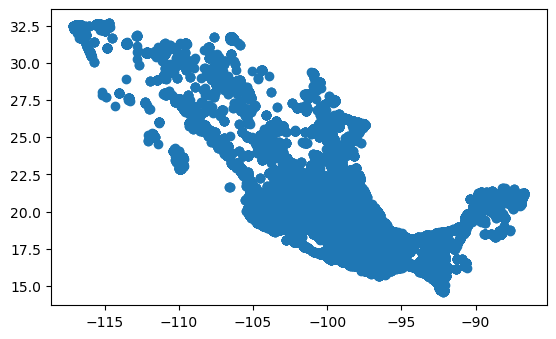

In [19]:
gdf_mayoristas.plot()

<AxesSubplot:>

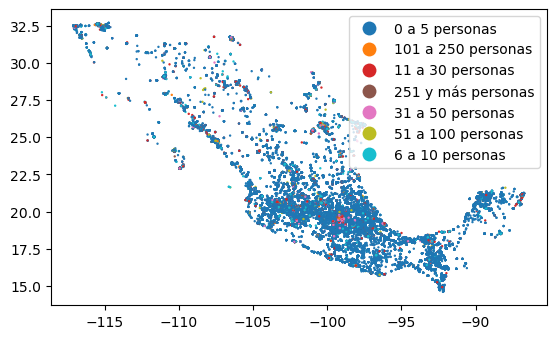

In [23]:
fig, ax = plt.subplots(1, 1)

gdf_mayoristas.plot(column='per_ocu', ax=ax, legend=True, markersize=0.5)

#inegi: 
#el marco geoestadístico
#https://www.inegi.org.mx/temas/mg/

![marco-geoestadistico.jpeg](C:\Users\User\Maestria\Tesis\marco-geoestadistico.jpeg)

Bájate el primero

![marco-geoestadistico-2.jpeg](C:\Users\User\Maestria\Tesis\marco-geoestadistico-2.jpeg)

Es un poco pesado pero ahí va a venir todos los shapefiles que podrías a necesitar de méxico

Ya una vez que los descargues, nomás pregúntale a nuestro compa chatgpt cómo poner un shapefile

Lo que tienes que hacer es es primero cargar los shapes de los estados y luego pones los puntos del mapa que me mostraste. Porque en todo el análisis geoespacial funciona con capas (como en fotoshop). Entonces, la primer capa es como "el fondo" y ahí van a venir las figuras de los estados y ya la segunda capa va a ser el "contenido", o sea las ubicaciones de los negocios abarroteros

In [16]:
#Vamos a juntarlo con por menor
df_menor = pd.read_csv('denue_inegi_46111_menor.csv', encoding='ISO-8859-1')
df_menor

C:\Users\User\AppData\Local\Temp\ipykernel_8020\363044225.py:2: DtypeWarning: Columns (35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_menor = pd.read_csv('denue_inegi_46111_menor.csv', encoding='ISO-8859-1')


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,7238693,01001461110053361000000000U8,ABARR0TES DON PEDRO,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,AVENIDA,POLIDUCTO,CALLE,...,Aguascalientes,3238,16,4493296002.0,NaN,NaN,Fijo,21.902728,-102.247834,2019-11
1,29758,01001461110049131000000000U2,ABARR0TES EL SAIDER,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,PASEO DE LA BIZNAGA,AVENIDA,...,Aguascalientes,3613,25,NaN,NaN,NaN,Fijo,21.868223,-102.232901,2014-12
2,47438,01007713120000321010000000U8,ABARR0TES PUENTES,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,PLAZA GUEL JIMENEZ,CALLE,...,Pablo Escaleras,0190,6,NaN,NaN,NaN,Fijo,22.248455,-102.333434,2014-12
3,929,01003461110002141001000000U2,ABARROTERA,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",6 a 10 personas,BOULEVARD,RODOLFO LANDEROS GALLEGOS,CALLE,...,Calvillo,0168,29,4959561441.0,NaN,NaN,Fijo,21.847281,-102.704958,2010-07
4,7407280,01004461110000581000000000U9,ABARROTERA DEL CENTRO,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,FRANCISCO I. MADERO,AVENIDA,...,Cosío,0108,9,NaN,NaN,NaN,Fijo,22.366288,-102.297583,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604386,9286131,32056461110013121000000000U2,VENTA DE PRODUCTOS VARIOS FRIDA,VENTA DE PRODECTOS VARIOS,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,CALLE,...,Zacatecas,0364,12,NaN,NaN,NaN,Fijo,22.763928,-102.545492,2020-11
604387,4638469,32034461110002551000000000U0,VENTA DE REFRESCO Y FRITURAS,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,LEOCADIO GONZALEZ,PRIVADA,...,Nochistlán de Mejía,0348,16,NaN,NaN,NaN,Fijo,21.369744,-102.847340,2014-12
604388,4618939,32007461110001231000000000U6,VERONICA,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,PROGRESO,CALLE,...,Concepción del Oro,0533,34,NaN,NaN,NaN,Fijo,24.612876,-101.422822,2010-07
604389,4638927,32023461110000921000000000U0,VERÓNICA PINEDA PLASCENCIA,ABARROTES MARYFER,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,GENERAL ENRIQUE ESTRADA,CALLE,...,Juchipila,0132,1,NaN,NaN,NaN,Fijo,21.411978,-103.115767,2014-12


In [18]:
#Agregamos la columna para minoristas
Minor = []
for i in range(len(df_menor)):
    Minorista = 'Menudeo'
    Minor.append(Minorista)

df_menor['Clasificación'] = Minor
df_menor

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,Clasificación
0,7238693,01001461110053361000000000U8,ABARR0TES DON PEDRO,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,AVENIDA,POLIDUCTO,CALLE,...,3238,16,4493296002.0,NaN,NaN,Fijo,21.902728,-102.247834,2019-11,Menudeo
1,29758,01001461110049131000000000U2,ABARR0TES EL SAIDER,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,PASEO DE LA BIZNAGA,AVENIDA,...,3613,25,NaN,NaN,NaN,Fijo,21.868223,-102.232901,2014-12,Menudeo
2,47438,01007713120000321010000000U8,ABARR0TES PUENTES,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,PLAZA GUEL JIMENEZ,CALLE,...,0190,6,NaN,NaN,NaN,Fijo,22.248455,-102.333434,2014-12,Menudeo
3,929,01003461110002141001000000U2,ABARROTERA,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",6 a 10 personas,BOULEVARD,RODOLFO LANDEROS GALLEGOS,CALLE,...,0168,29,4959561441.0,NaN,NaN,Fijo,21.847281,-102.704958,2010-07,Menudeo
4,7407280,01004461110000581000000000U9,ABARROTERA DEL CENTRO,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,FRANCISCO I. MADERO,AVENIDA,...,0108,9,NaN,NaN,NaN,Fijo,22.366288,-102.297583,2019-11,Menudeo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604386,9286131,32056461110013121000000000U2,VENTA DE PRODUCTOS VARIOS FRIDA,VENTA DE PRODECTOS VARIOS,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,CALLE,...,0364,12,NaN,NaN,NaN,Fijo,22.763928,-102.545492,2020-11,Menudeo
604387,4638469,32034461110002551000000000U0,VENTA DE REFRESCO Y FRITURAS,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,LEOCADIO GONZALEZ,PRIVADA,...,0348,16,NaN,NaN,NaN,Fijo,21.369744,-102.847340,2014-12,Menudeo
604388,4618939,32007461110001231000000000U6,VERONICA,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,PROGRESO,CALLE,...,0533,34,NaN,NaN,NaN,Fijo,24.612876,-101.422822,2010-07,Menudeo
604389,4638927,32023461110000921000000000U0,VERÓNICA PINEDA PLASCENCIA,ABARROTES MARYFER,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,GENERAL ENRIQUE ESTRADA,CALLE,...,0132,1,NaN,NaN,NaN,Fijo,21.411978,-103.115767,2014-12,Menudeo


In [19]:
#create GeoDataFrame
gdf_minoristas = gpd.GeoDataFrame(df_menor, geometry=gpd.points_from_xy(df_menor.longitud, df_menor.latitud))
gdf_minoristas.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,Clasificación,geometry
0,7238693,01001461110053361000000000U8,ABARR0TES DON PEDRO,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,AVENIDA,POLIDUCTO,CALLE,...,16,4493296002.0,NaN,NaN,Fijo,21.902728,-102.247834,2019-11,Menudeo,POINT (-102.24783 21.90273)
1,29758,01001461110049131000000000U2,ABARR0TES EL SAIDER,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,PASEO DE LA BIZNAGA,AVENIDA,...,25,NaN,NaN,NaN,Fijo,21.868223,-102.232901,2014-12,Menudeo,POINT (-102.23290 21.86822)
2,47438,01007713120000321010000000U8,ABARR0TES PUENTES,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,PLAZA GUEL JIMENEZ,CALLE,...,6,NaN,NaN,NaN,Fijo,22.248455,-102.333434,2014-12,Menudeo,POINT (-102.33343 22.24845)
3,929,01003461110002141001000000U2,ABARROTERA,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",6 a 10 personas,BOULEVARD,RODOLFO LANDEROS GALLEGOS,CALLE,...,29,4959561441.0,NaN,NaN,Fijo,21.847281,-102.704958,2010-07,Menudeo,POINT (-102.70496 21.84728)
4,7407280,01004461110000581000000000U9,ABARROTERA DEL CENTRO,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,FRANCISCO I. MADERO,AVENIDA,...,9,NaN,NaN,NaN,Fijo,22.366288,-102.297583,2019-11,Menudeo,POINT (-102.29758 22.36629)


In [24]:
gdf_minoristas.dtypes

id                  int64
clee               object
nom_estab          object
raz_social         object
codigo_act          int64
nombre_act         object
per_ocu            object
tipo_vial          object
nom_vial           object
tipo_v_e_1         object
nom_v_e_1          object
tipo_v_e_2         object
nom_v_e_2          object
tipo_v_e_3         object
nom_v_e_3          object
numero_ext        float64
letra_ext          object
edificio           object
edificio_e         object
numero_int        float64
letra_int          object
tipo_asent         object
nomb_asent         object
tipoCenCom         object
nom_CenCom         object
num_local          object
cod_postal        float64
cve_ent             int64
entidad            object
cve_mun             int64
municipio          object
cve_loc             int64
localidad          object
ageb               object
manzana             int64
telefono           object
correoelec         object
www                object
tipoUniEco  

<AxesSubplot:>

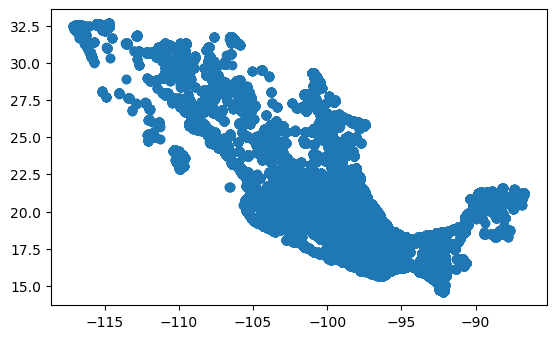

In [28]:
gdf_minoristas.plot()